In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

Latitude: 1 deg = 110.574 km
Longitude: 1 deg = 111.320*cos(latitude) km

In [5]:
accg3=pd.read_csv("100081.csv")
accg3.columns=["緯度","經度","狀態"]
accg3.head()
s=accg3[["緯度","經度"]].copy()
s

,緯度,經度
0,25.0365,121.5686
1,25.0367,121.5697
2,25.0368,121.5697
3,25.0369,121.5696
4,25.0369,121.5697
5,25.0372,121.5684
6,25.0372,121.5685
7,25.0372,121.5693
8,25.0372,121.5695
9,25.0373,121.5694


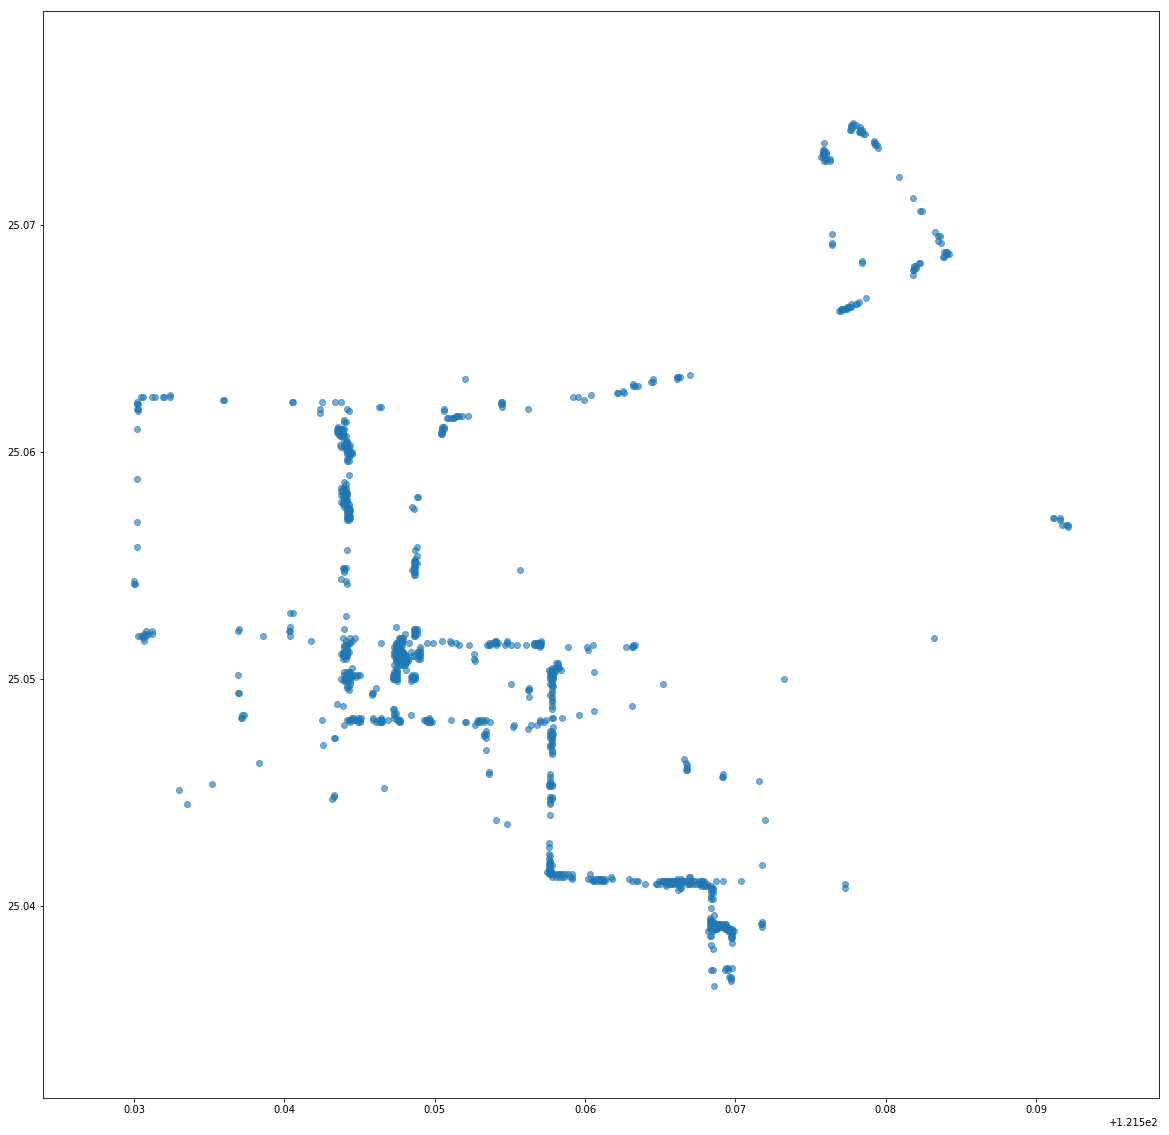

In [6]:
fig = plt.figure(figsize = (20,20))
plt.scatter(s['經度'],s['緯度'], alpha=0.6) 

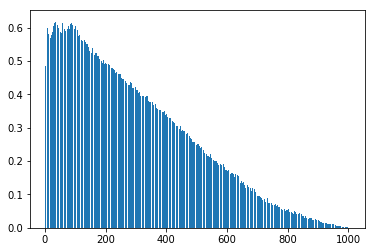

In [66]:
from sklearn import cluster, datasets, metrics
silhouette_avgs = []
ks = range(2, s.shape[0])
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(s)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(s, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
plt.bar(ks, silhouette_avgs)
plt.show()

In [67]:
print( silhouette_avgs.index(max(silhouette_avgs)))

39


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[[ 25.06011333 121.54419333]
 [ 25.04134167 121.55870833]
 [ 25.06899231 121.58381538]
 [ 25.05156    121.55498   ]
 [ 25.05006364 121.54430606]
 [ 25.0389375  121.56954167]
 [ 25.05193333 121.53075   ]
 [ 25.063075   121.564225  ]
 [ 25.05018421 121.54737368]
 [ 25.06197778 121.53031111]
 [ 25.06174444 121.55156667]
 [ 25.07423125 121.57806875]
 [ 25.056925   121.591675  ]
 [ 25.05022759 121.55790345]
 [ 25.0485875  121.5372375 ]
 [ 25.04813333 121.55173333]
 [ 25.04108    121.56676   ]
 [ 25.06637333 121.57747333]
 [ 25.05504737 121.54866842]
 [ 25.05738696 121.54423913]
 [ 25.04545556 121.5577    ]
 [ 25.04834286 121.54747857]
 [ 25.04573333 121.56916667]
 [ 25.05144    121.5631    

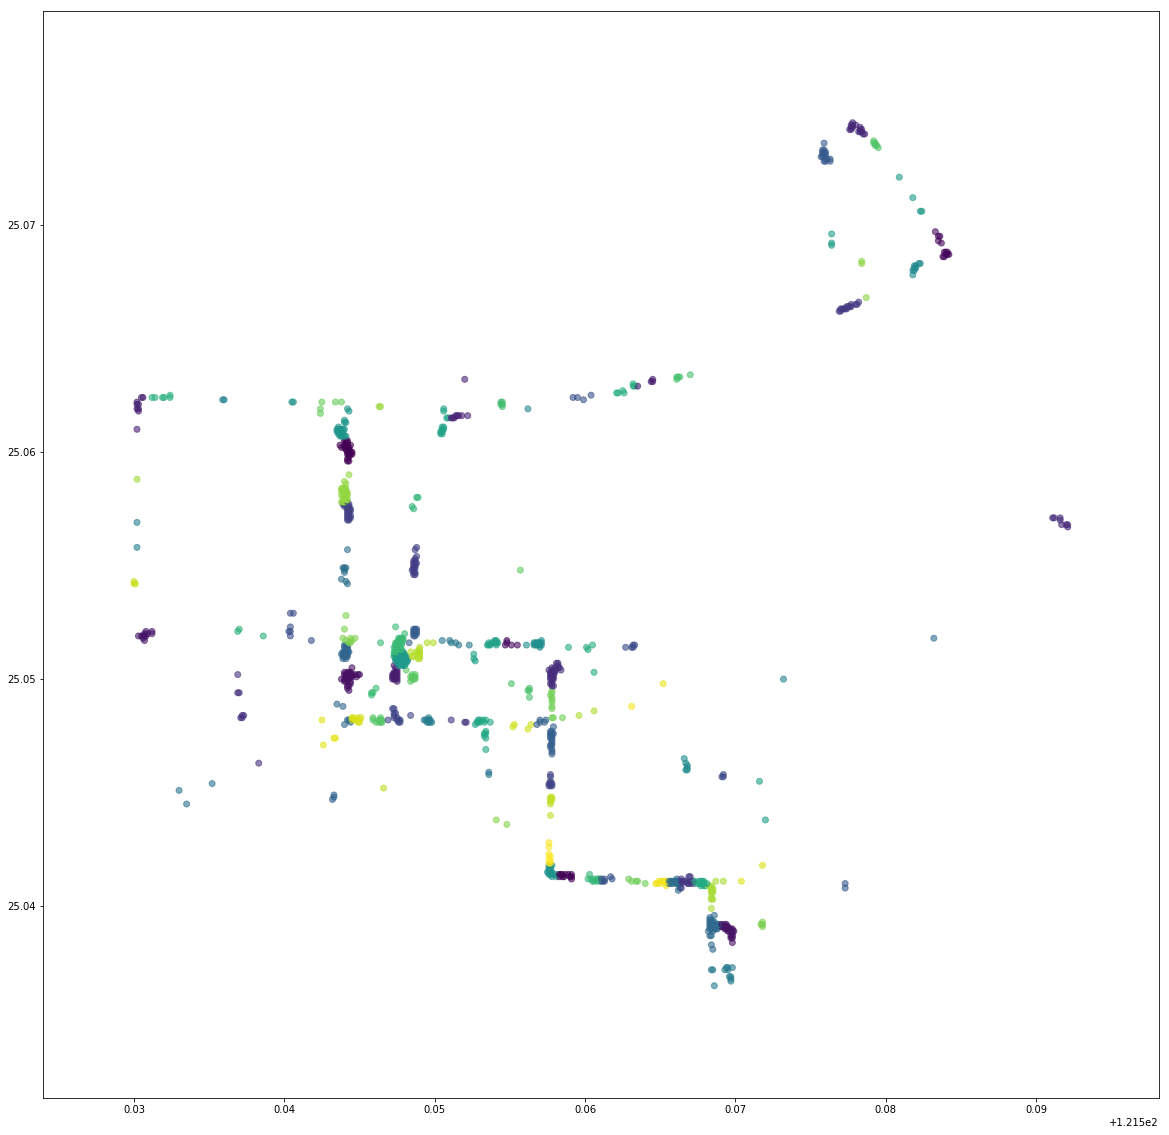

In [64]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters= 100 )
clf.fit(s)
clf.labels_
fig = plt.figure(figsize = (20,20))
plt.scatter(s['經度'],s['緯度'], alpha=0.6,c=clf.labels_) 
print ( np.unique(clf.labels_)  )
centers = clf.cluster_centers_
print (centers)

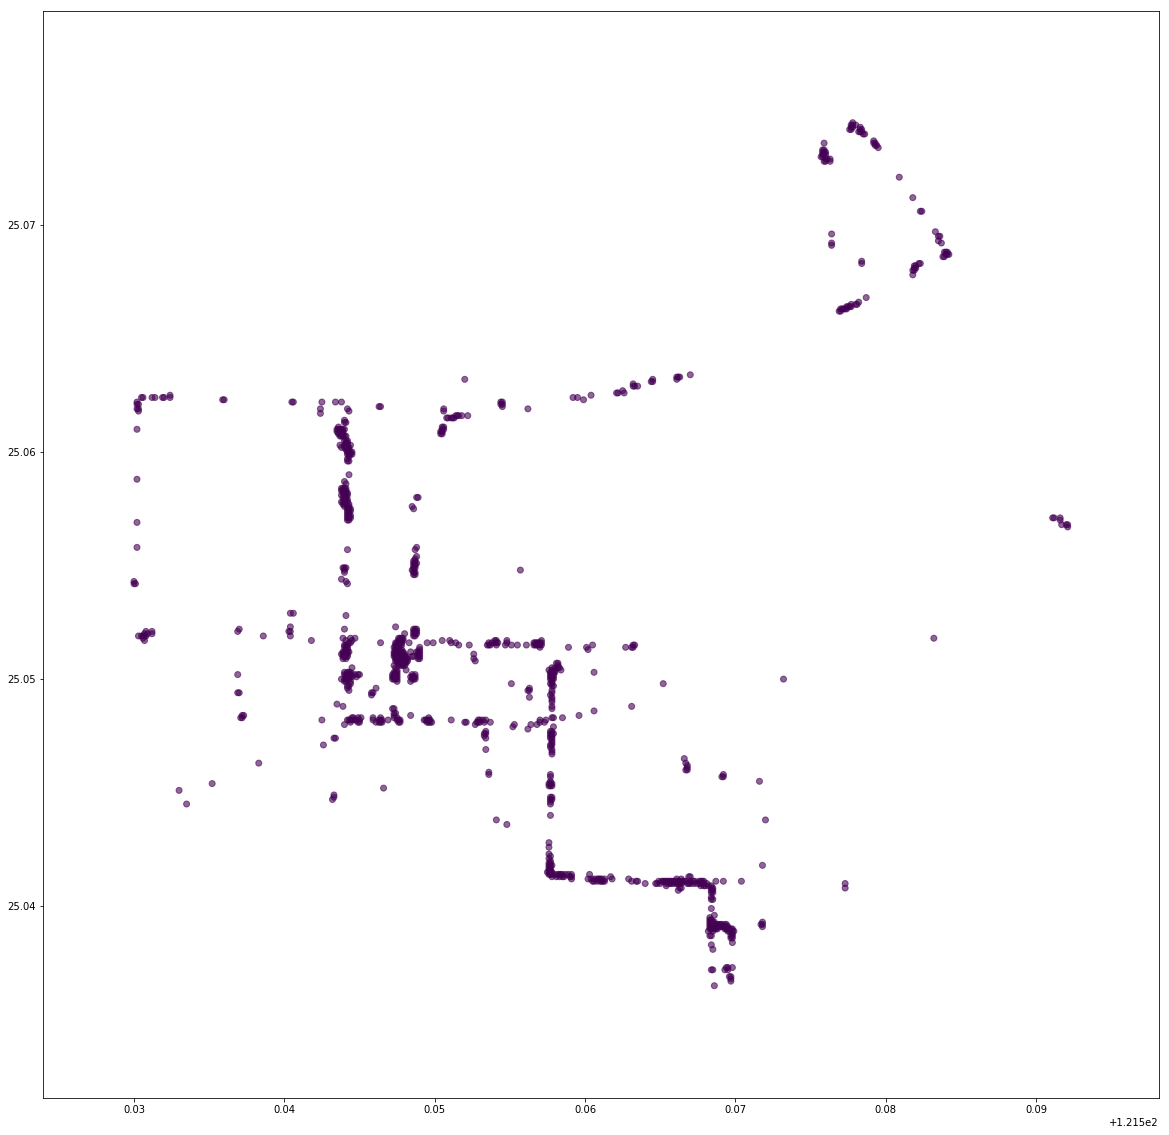

In [15]:
from sklearn.cluster import DBSCAN
y_pred = DBSCAN().fit_predict(s)
fig = plt.figure(figsize = (20,20))
plt.scatter(s['經度'],s['緯度'], alpha=0.6,c=y_pred) 

默認 eps = 0.5, min_samples = 5

1005
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


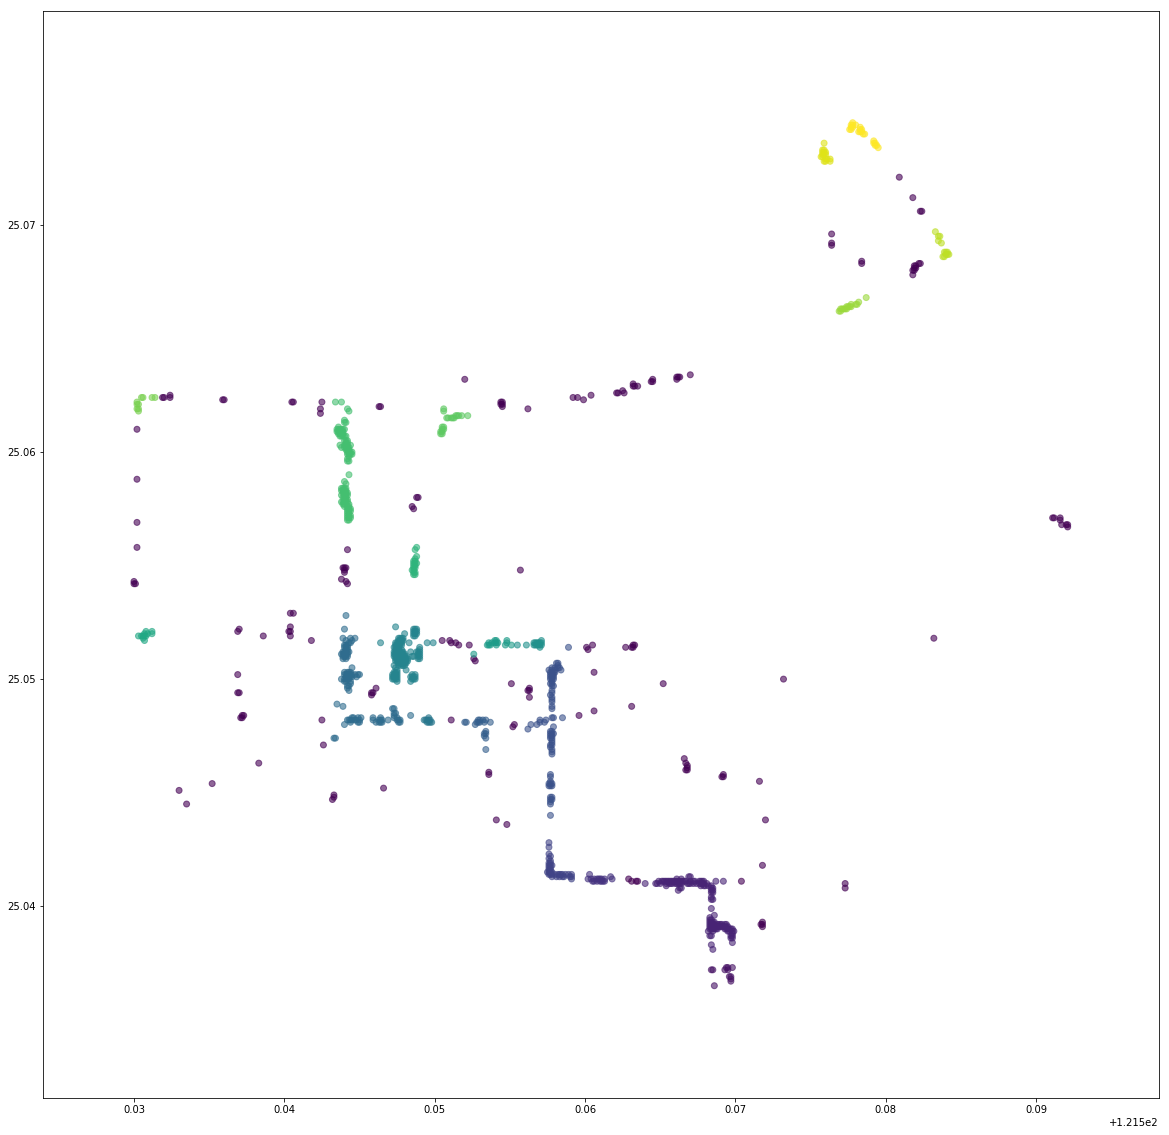

In [60]:
y_pred = DBSCAN(eps = 0.001, min_samples = 10).fit_predict(s)
fig = plt.figure(figsize = (20,20))
plt.scatter(s['經度'],s['緯度'], alpha=0.6,c=y_pred) 
print ( len(y_pred)   )
print ( np.unique(y_pred)  )

## Hierarchical Clustering

[ 4  4  4 ... 11 11 11]
1005
---


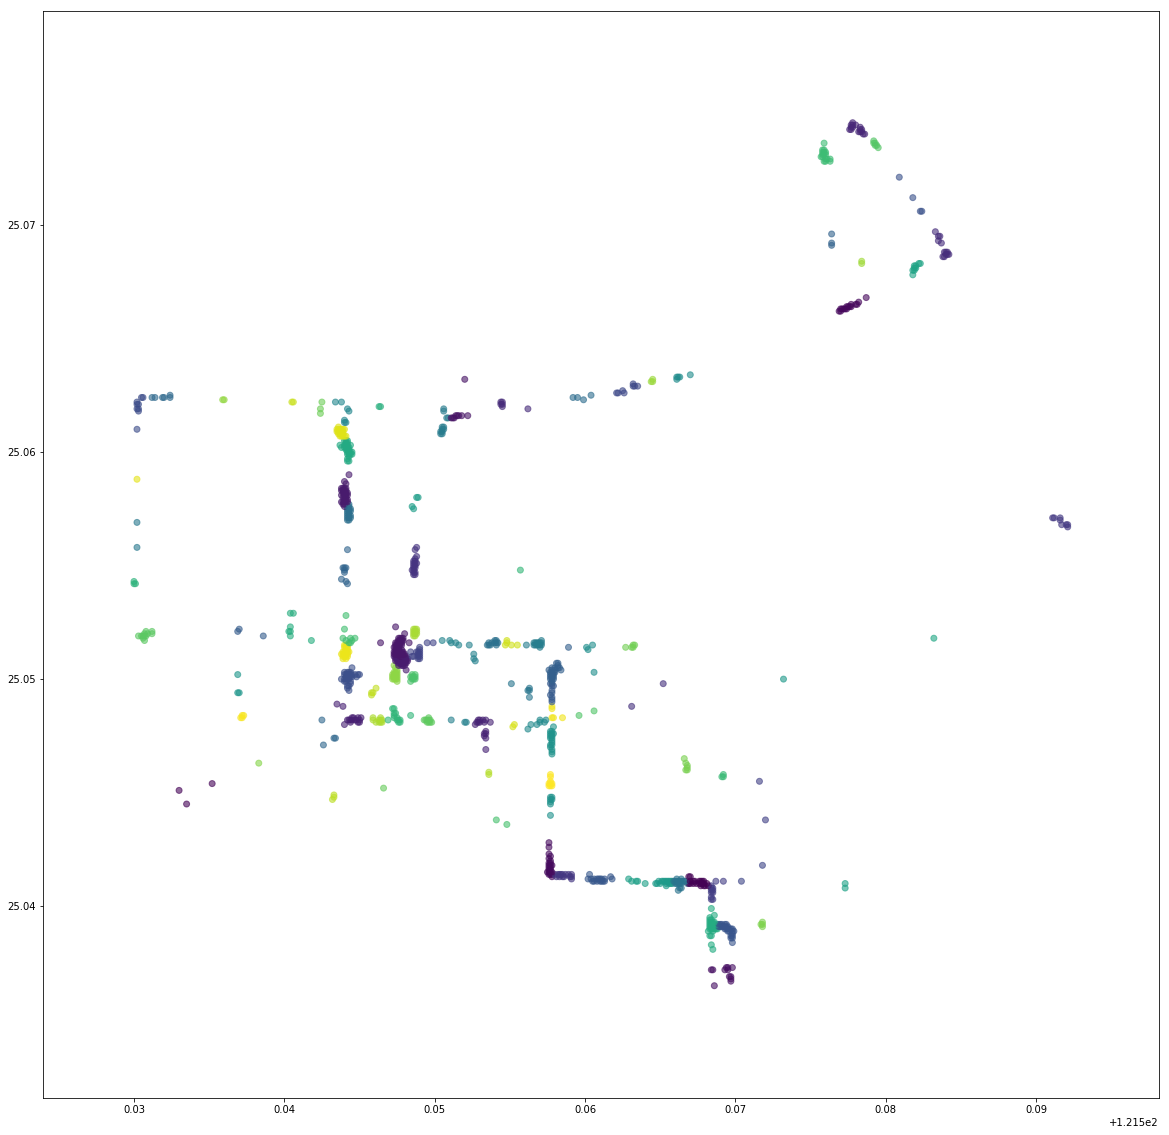

In [58]:
# Hierarchical Clustering 演算法
hclust = cluster.AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 100)

# 印出分群結果
hclust.fit(s)
cluster_labels = hclust.labels_
print(cluster_labels)
print(len(cluster_labels))
print("---")

fig = plt.figure(figsize = (20,20))
plt.scatter(s['經度'],s['緯度'], alpha=0.6,c=cluster_labels) 

# 路網建置

In [11]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters= 39 )
clf.fit(s)
clf.labels_
print ( np.unique(clf.labels_)  )
centers = clf.cluster_centers_
print (centers)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
[[ 25.04104884 121.56594419]
 [ 25.05088091 121.54771091]
 [ 25.068892   121.582956  ]
 [ 25.05049811 121.55748491]
 [ 25.06069206 121.54401111]
 [ 25.0625125  121.56105   ]
 [ 25.04161842 121.55802895]
 [ 25.05221    121.53968   ]
 [ 25.06194375 121.53089375]
 [ 25.04088438 121.56824687]
 [ 25.07307059 121.57594706]
 [ 25.0518     121.5832    ]
 [ 25.05063582 121.5442    ]
 [ 25.06142857 121.551     ]
 [ 25.04771818 121.55331364]
 [ 25.056925   121.591675  ]
 [ 25.05285882 121.53055882]
 [ 25.05552174 121.54867391]
 [ 25.04492222 121.55735   ]
 [ 25.038716   121.56915333]
 [ 25.06313333 121.56485833]
 [ 25.05155    121.55381667]
 [ 25.04613333 121.568725  ]
 [ 25.05456    121.54404   ]
 [ 25.05782885 121.54411346]
 [ 25.0515625  121.54899375]
 [ 25.04828571 121.54605952]
 [ 25.06892    121.5772    ]
 [ 25.05074167 121.56215   ]
 [ 25.04779697 121.5576697 ]
 [ 25.0409

In [33]:
random.randint(1,40)

23

In [62]:
import random
success = 1000
fail = 500
capacity=100
total=['1' for i in range(success) ]+['0' for i in range(fail) ]        
random.shuffle(total)


customer=['a' for i in range(39)]

for i in total: 
    n=random.randint(0,38)
    customer[n]+=i
    
#print (customer)
 
for i in range(39):
    print (str(i),customer[i].count('1'), customer[i].count('0') )


0 30 16
1 29 14
2 33 13
3 20 17
4 25 12
5 25 11
6 29 10
7 25 16
8 29 17
9 29 16
10 22 19
11 29 13
12 28 13
13 13 12
14 29 11
15 18 9
16 23 13
17 26 10
18 29 12
19 20 12
20 20 13
21 21 5
22 24 18
23 19 17
24 26 13
25 16 13
26 24 13
27 24 9
28 31 10
29 32 14
30 30 9
31 29 16
32 25 20
33 36 14
34 28 13
35 28 9
36 18 11
37 24 9
38 34 8


In [41]:

ss=[0 for i in range(len(centers)) ]
fa=[0 for i in range(len(centers)) ]

trips = int((success+fail)/capacity)
site=tuple(zip([str(i) for i in range(1,len(centers)+1)],["D" for i in range(len(centers)) ]    )  )




for i in range(trips):
    site.setdefault('0'+str(i),'O')

customers_O = (25,121)


#customer=dict(zip(site,centers))
#customer



AttributeError: 'tuple' object has no attribute 'setdefault'